<a href="https://colab.research.google.com/github/srivastavavansh94/loan_prediction/blob/main/Loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

LOADING THE DATASET

In [2]:
df = pd.read_csv('/content/loan_prediction.csv')

GETTING SOME DETAILS ABOUT DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


KNOWING THE NULL VALUES

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

PLOTTING SOME GRAPH FOR BETTER UNDERSTANDING OF DATA

<Axes: xlabel='LoanAmount', ylabel='Count'>

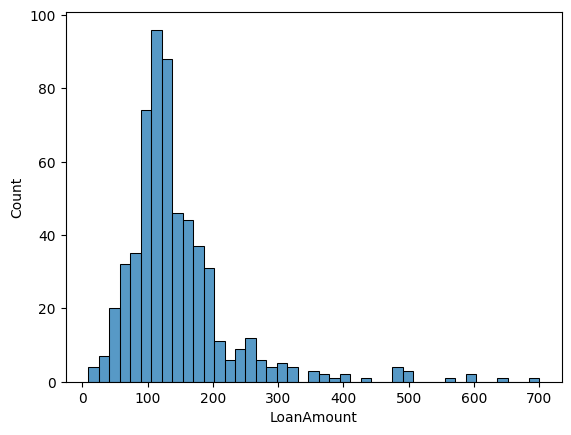

In [8]:
sns.histplot(df.LoanAmount)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

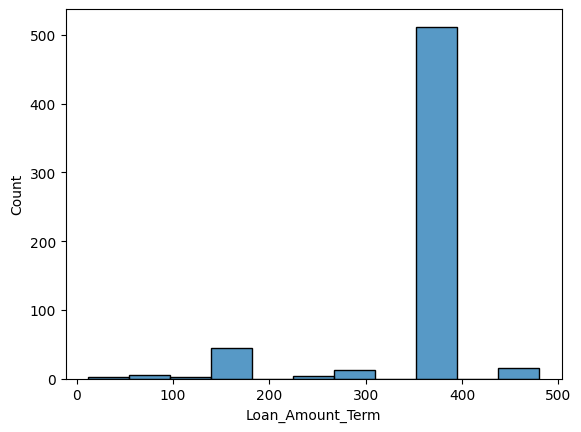

In [9]:
sns.histplot(df.Loan_Amount_Term)

<Axes: xlabel='Self_Employed', ylabel='Count'>

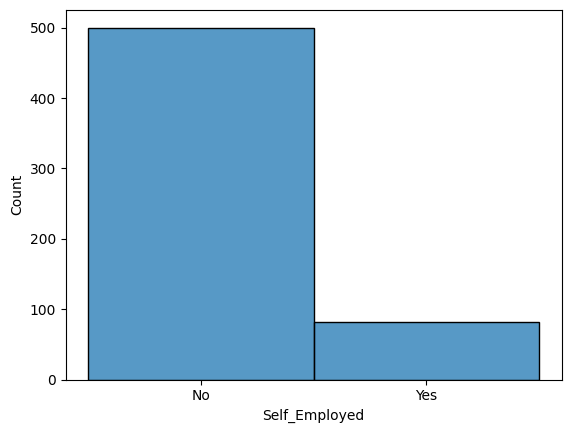

In [10]:
sns.histplot(df.Self_Employed)

FILLING THE NULL VALUES

In [11]:
df['Married'] = df['Married'].fillna('Yes')

In [12]:
df['Married'].isnull().sum()

0

In [13]:
df = df.replace(to_replace='3+',value=4)

In [14]:
df['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

<Axes: xlabel='Dependents', ylabel='Density'>

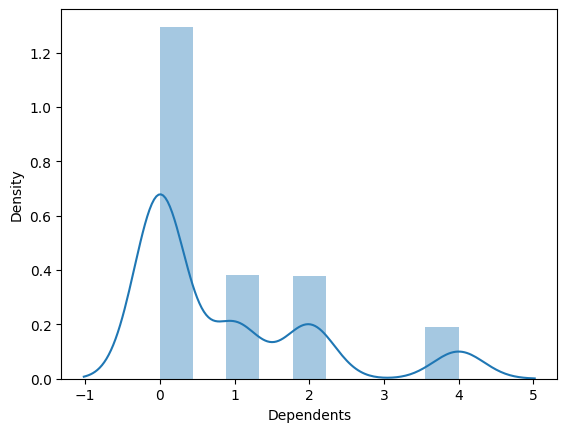

In [15]:
sns.distplot(df.Dependents)

In [16]:
df['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [17]:
df['Dependents'].fillna(0,inplace=True)

<Axes: xlabel='Dependents', ylabel='Density'>

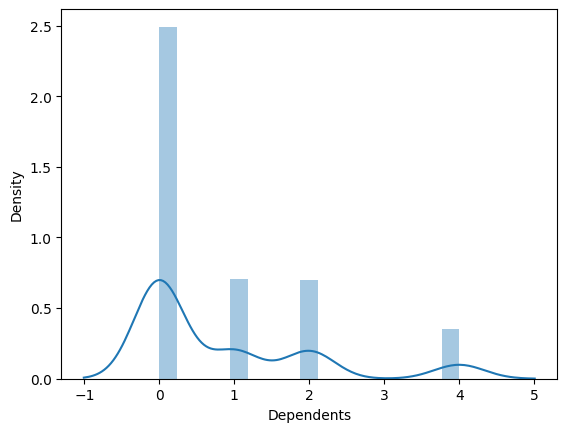

In [18]:
sns.distplot(df.Dependents)

FILLING THE NULL VALUES WITH CENTRAL TENDENCY

In [19]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [20]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [21]:
df['Self_Employed'].fillna('No',inplace=True)

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
Self_Employ = df['Self_Employed'].mode()
Self_Employ

0    No
Name: Self_Employed, dtype: object

DROPPING SOME RECORDS OF NULL VALUES

In [24]:
df = df.dropna()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            552 non-null    object 
 1   Gender             552 non-null    object 
 2   Married            552 non-null    object 
 3   Dependents         552 non-null    object 
 4   Education          552 non-null    object 
 5   Self_Employed      552 non-null    object 
 6   ApplicantIncome    552 non-null    int64  
 7   CoapplicantIncome  552 non-null    float64
 8   LoanAmount         552 non-null    float64
 9   Loan_Amount_Term   552 non-null    float64
 10  Credit_History     552 non-null    float64
 11  Property_Area      552 non-null    object 
 12  Loan_Status        552 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.4+ KB


In [26]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

REPLACING THE CATEGORICAL TEXT DATA WITH THE NUMERICAL DATA

In [27]:
df.replace({'Gender':{'Male':0,'Female':1},'Married':{'No':0,'Yes':1},'Education':{'Not Graduate':0,'Graduate':1},'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [29]:
df.shape

(552, 13)

DIVIDING DATA INTO TWO VARIABLES

In [30]:
X = df.drop(['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [31]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0          0          1              0             5849   
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [32]:
print(Y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 552, dtype: int64


SPLITTING THE DATASET INTO TRAINING AND TESTING DATA

In [33]:
from sklearn.model_selection import train_test_split

X_train ,X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.15,stratify=Y,random_state=42)

In [34]:
X.shape , X_train.shape , X_test.shape

((552, 11), (469, 11), (83, 11))

IMPORTING THE SVM MODEL AND FITTING IT TO TRAINING DATA

In [35]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [36]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train,Y_train)

SVC(kernel='linear')

GETTING ACCURACY FOR TRAINIG DATA

In [37]:
train_pred_svm = svm_model.predict(X_train)
acc_train_svm = accuracy_score(train_pred_svm,Y_train)

print('Accuracy score for SVM : ',acc_train_svm)

Accuracy score for SVM :  0.7995735607675906


GETTING ACCURACY FOR TESTING DATA

In [38]:
test_pred_svm = svm_model.predict(X_test)
acc_test_svm = accuracy_score(test_pred_svm,Y_test)

print('Accuracy score for SVM : ',acc_test_svm)

Accuracy score for SVM :  0.8433734939759037


IMORTING THE DECISION TREE MODEL

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [40]:
dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(X_train ,Y_train)

DecisionTreeClassifier()

GETTING ACCURACY FOR TRAINING DATA

In [41]:
train_pred_dtree = dtreemodel.predict(X_train)
acc_train_dtree = accuracy_score(train_pred_dtree,Y_train)

print('Accuracy score for DecisionTree : ',acc_train_dtree)

Accuracy score for DecisionTree :  1.0


GETTING ACCURACY FOR TESTING DATA

In [42]:
test_pred_dtree = dtreemodel.predict(X_test)
acc_test_dtree = accuracy_score(test_pred_dtree,Y_test)

print('Accuracy Score for DecisionTress : ',acc_test_dtree)

Accuracy Score for DecisionTress :  0.7710843373493976


IMPORTING THE LOGISTIC REGRESSION MODEL

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logregmodel = LogisticRegression()
logregmodel.fit(X_train,Y_train)

LogisticRegression()

GETTING ACCURACY SCORE FOR TRAINNG DATA

In [45]:
train_pred_logreg = logregmodel.predict(X_train)
acc_train_logreg = accuracy_score(train_pred_logreg,Y_train)

print('Accuracy score for Logistic Regression : ',acc_train_logreg)

Accuracy score for Logistic Regression :  0.8102345415778252


GETTING ACCURACY FOR TESTING DATA

In [46]:
test_pred_logreg = logregmodel.predict(X_test)
acc_test_logreg = accuracy_score(test_pred_logreg,Y_test)

print('Accuracy Score for Logistic Regression : ',acc_test_logreg)

Accuracy Score for Logistic Regression :  0.8433734939759037


IMPORTING THE RANDOM FOREST CLASSIFIER MODEL

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfcmodel = RandomForestClassifier()
rfcmodel.fit(X_train,Y_train)

RandomForestClassifier()

GETTING ACCURACY FOR TRAINING DATA

In [49]:
train_pred_rfc = rfcmodel.predict(X_train)
acc_train_rfc = accuracy_score(train_pred_rfc,Y_train)

print('Accuracy score for RandomForest : ',acc_train_rfc)

Accuracy score for RandomForest :  0.997867803837953


GETTING ACCURACY FOR TESTING DATA

In [50]:
test_pred_rfc = rfcmodel.predict(X_test)
acc_test_rfc = accuracy_score(test_pred_rfc,Y_test)

print('Accuracy Score for RandomForest : ',acc_test_rfc)

Accuracy Score for RandomForest :  0.7951807228915663


In [51]:
import pickle

saved_model = pickle.dumps(logregmodel)

logreg_saved_model = pickle.loads(saved_model)

In [52]:
predicted_value = logreg_saved_model.predict([[0,1,2,0,1,7.5,1,4.8,540,1,2]])

if(predicted_value[0]==1):
  print('The person is eligible for loan')
else:
  print('The perso is not eligible for loan')

The person is eligible for loan
